# Crime Project - Data Exploration

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import fiona
import geopandas
import json
import scipy.stats as sts
from scipy.stats import linregress

# Google developer API key
from api_keys import g_key

# Configure gmaps
gmaps.configure(api_key=g_key)

In [2]:
# Store filepath in a variable
shooting_crime_file_historic = "Resources/NYPD_Shooting_Incident_Data__Historic_.csv"
shooting_crime_ytd = "Resources/NYPD_Shooting_Incident_Data__Year_To_Date_.csv"

shooting_df_historic = pd.read_csv(shooting_crime_file_historic)
shooting_df_ytd = pd.read_csv(shooting_crime_ytd)

shooting_df = shooting_df_historic.append(shooting_df_ytd)
shooting_df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,156430715,09/02/2016,20:36:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,25-44,F,BLACK,1007885,246406,40.842979,-73.914580,POINT (-73.91457972899997 40.842979335000045)
1,145001700,08/02/2015,1:30:00,BRONX,43,0.0,NaN,False,NaN,NaN,NaN,<18,F,BLACK,1023203,238742,40.821890,-73.859262,POINT (-73.85926192199997 40.82188959900003)
2,137584243,07/04/2014,22:39:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1000493,236572,40.816005,-73.941320,POINT (-73.94131972799995 40.81600451200006)
3,154563857,07/03/2016,1:30:00,BROOKLYN,83,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1008115,190458,40.689416,-73.913947,POINT (-73.91394709799994 40.68941602700004)
4,33160009,07/17/2007,23:30:00,BROOKLYN,71,0.0,NaN,False,NaN,NaN,NaN,<18,M,BLACK,995163,178527,40.656694,-73.960670,POINT (-73.96066977199997 40.656693553000025)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,207815720,01/11/2020,21:45:00,BRONX,41,0.0,NaN,False,25-44,M,BLACK,25-44,M,WHITE HISPANIC,1013623,238400,40.820988,-73.893876,NaN
660,211830262,04/07/2020,18:15:00,BRONX,44,0.0,NaN,False,45-64,M,WHITE HISPANIC,45-64,M,BLACK,1003841,237690,40.819066,-73.929221,NaN
661,209281499,02/08/2020,05:30:00,QUEENS,103,0.0,NaN,False,NaN,NaN,NaN,18-24,M,BLACK,1048161,195864,40.704056,-73.769495,NaN
662,214694690,06/28/2020,23:38:00,BRONX,44,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,1007770,242308,40.831732,-73.915010,NaN


In [3]:
boroughs = ["BRONX","BROOKLYN","MANHATTAN","QUEENS","STATEN ISLAND"]
counties = ["Bronx","Kings","New York","Queens","Richmond"]
population_estimate = [1418207,2559903,1628706,2253858,476143]
gdp_billions = [42695,91559,600244,93310,14514]
gdp_per_capita = [30100,35800,368500,41400,30500]
land_area_miles = [42.10,70.82,22.83,108.53,58.37]
land_area_km = [109.04,183.42,59.13,281.09,151.18]
density_persons_sm = [33867,36147,71341,20767,8157]
density_persons_km = [13006,13957,27544,8018,3150]

nyc_five_boroughs_df = pd.DataFrame({
    "BORO" : boroughs,
    "Counties" : counties,
    "Population" : population_estimate,
    "GDP Billions" : gdp_billions,
    "GDP Per Capita" : gdp_per_capita,
    "Land Area Miles" : land_area_miles,
    "Land Area Kilometers" : land_area_km,
    "Density Persons Square Miles" : density_persons_sm,
    "Density Persons Kilometers" : density_persons_km
})

nyc_five_boroughs_df

#nyc_shootings_borough_df = pd.merge(shooting_df, nyc_five_boroughs_df, on="BORO")
#nyc_shootings_borough_df.head()

,BORO,Counties,Population,GDP Billions,GDP Per Capita,Land Area Miles,Land Area Kilometers,Density Persons Square Miles,Density Persons Kilometers
0,BRONX,Bronx,1418207,42695,30100,42.10,109.04,33867,13006
1,BROOKLYN,Kings,2559903,91559,35800,70.82,183.42,36147,13957
2,MANHATTAN,New York,1628706,600244,368500,22.83,59.13,71341,27544
3,QUEENS,Queens,2253858,93310,41400,108.53,281.09,20767,8018
4,STATEN ISLAND,Richmond,476143,14514,30500,58.37,151.18,8157,3150


In [4]:
shooting_df["Year"] = pd.DatetimeIndex(shooting_df['OCCUR_DATE']).year
shooting_df["ShootingMonth"] = pd.DatetimeIndex(shooting_df['OCCUR_DATE']).month
shooting_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Year,ShootingMonth
0,156430715,09/02/2016,20:36:00,BRONX,44,0.0,NaN,False,NaN,NaN,...,25-44,F,BLACK,1007885,246406,40.842979,-73.914580,POINT (-73.91457972899997 40.842979335000045),2016,9
1,145001700,08/02/2015,1:30:00,BRONX,43,0.0,NaN,False,NaN,NaN,...,<18,F,BLACK,1023203,238742,40.821890,-73.859262,POINT (-73.85926192199997 40.82188959900003),2015,8
2,137584243,07/04/2014,22:39:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,...,18-24,M,BLACK,1000493,236572,40.816005,-73.941320,POINT (-73.94131972799995 40.81600451200006),2014,7
3,154563857,07/03/2016,1:30:00,BROOKLYN,83,0.0,NaN,False,NaN,NaN,...,18-24,M,BLACK,1008115,190458,40.689416,-73.913947,POINT (-73.91394709799994 40.68941602700004),2016,7
4,33160009,07/17/2007,23:30:00,BROOKLYN,71,0.0,NaN,False,NaN,NaN,...,<18,M,BLACK,995163,178527,40.656694,-73.960670,POINT (-73.96066977199997 40.656693553000025),2007,7


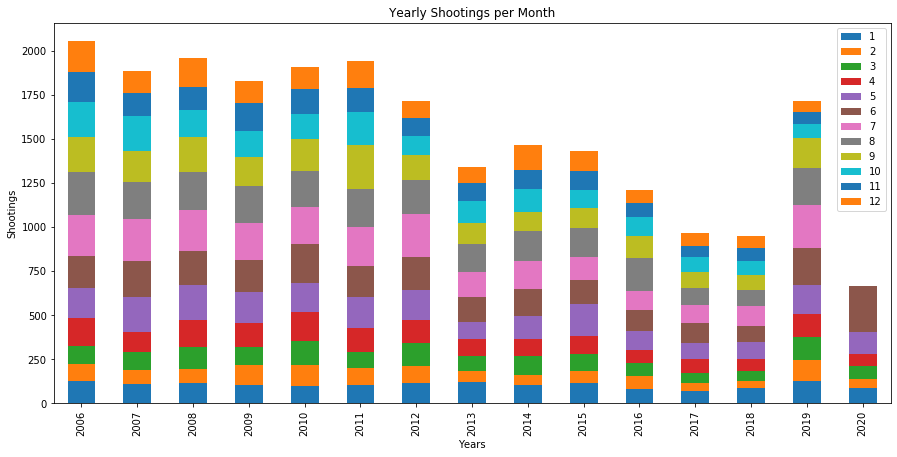

In [5]:
shooting_month_counts = shooting_df.groupby(["Year","ShootingMonth"])["Year"].count().unstack("ShootingMonth")

shooting_month_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")
plt.title("Yearly Shootings per Month")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

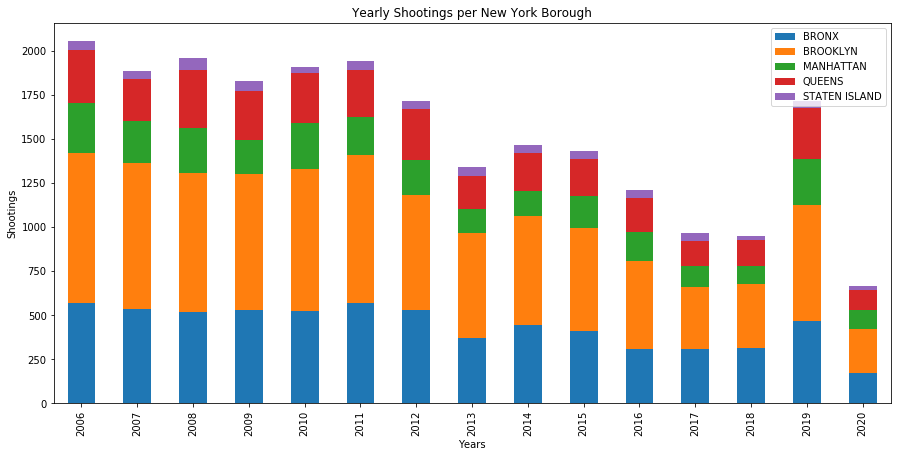

In [6]:
shooting_counts = shooting_df.groupby(["Year","BORO"])["Year"].count().unstack("BORO")

shooting_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")
plt.title("Yearly Shootings per New York Borough")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

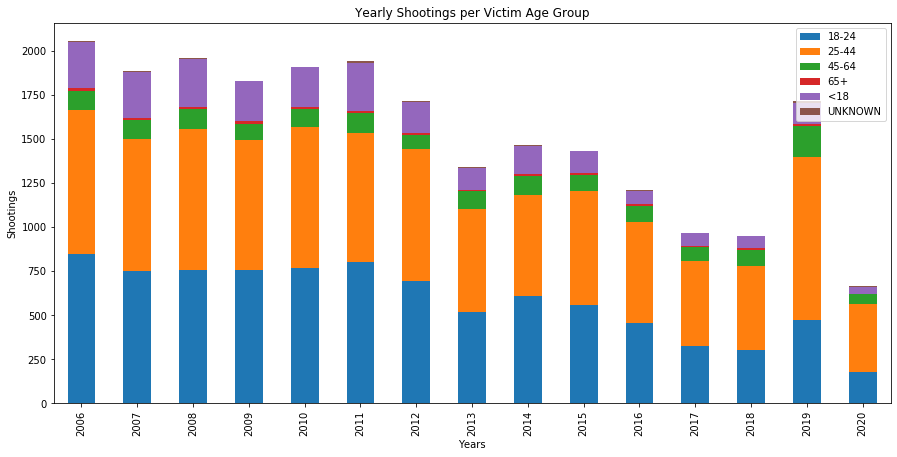

In [7]:
shooting_victim_age_counts = shooting_df.groupby(["Year","VIC_AGE_GROUP"])["Year"].count().unstack("VIC_AGE_GROUP")

shooting_victim_age_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="upper right")

plt.title("Yearly Shootings per Victim Age Group")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

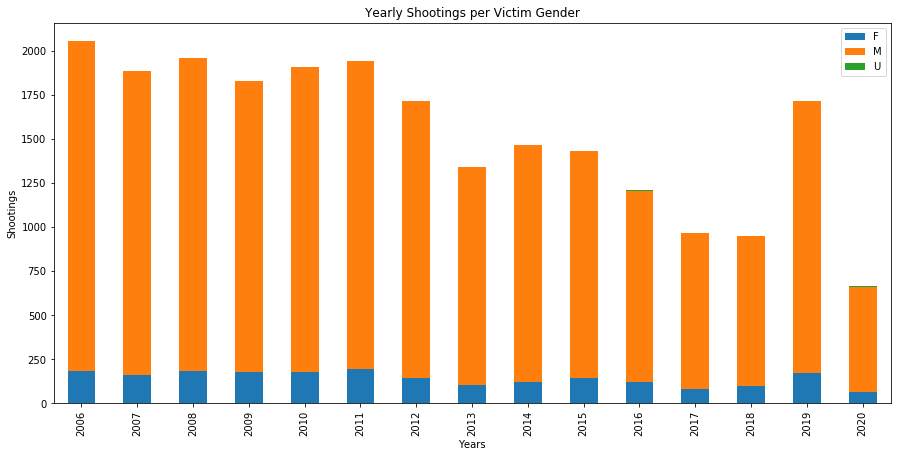

In [8]:
shooting_victim_sex_counts = shooting_df.groupby(["Year","VIC_SEX"])["Year"].count().unstack("VIC_SEX")

shooting_victim_sex_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")

plt.title("Yearly Shootings per Victim Gender")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

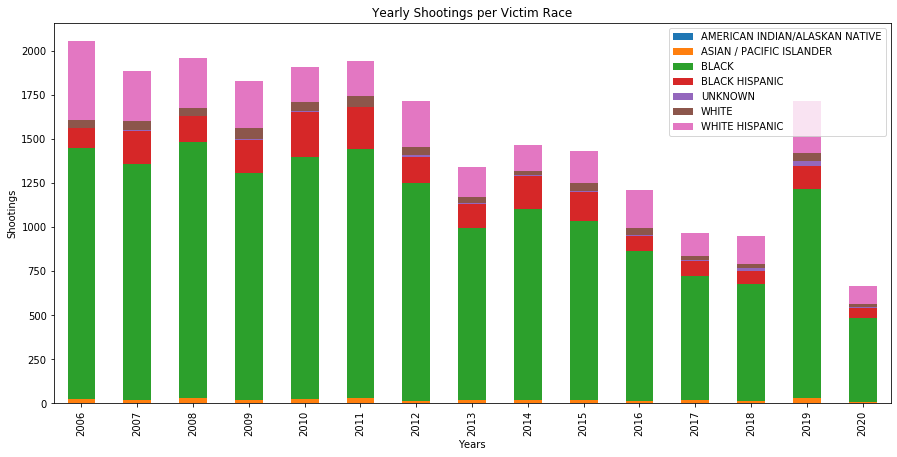

In [9]:
shooting_victim_race_counts = shooting_df.groupby(["Year","VIC_RACE"])["Year"].count().unstack("VIC_RACE")

shooting_victim_race_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")

plt.title("Yearly Shootings per Victim Race")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

In [10]:
# Store latitude and longitude in locations
locations = shooting_df[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
#weights = shooting_df["Year"].astype(float)

# Plot Heatmap
fig = gmaps.figure(center=(40.7128,-74.0060),zoom_level=10)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations)

# Add layer
fig.add_layer(heat_layer)

gmaps.configure(api_key=g_key)
with open('Resources/Borough Boundaries.geojson') as f:
    geometry = json.load(f)
geojson_layer = gmaps.geojson_layer(geometry, fill_color="white", fill_opacity=0.0, stroke_weight=2)
fig.add_layer(geojson_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [11]:
shooting_df[["TIME_HOUR","TIME_MIN","TIME_SEC"]] = shooting_df['OCCUR_TIME'].str.split(":",expand=True)
shooting_df['TIME_HOUR'] = pd.to_numeric(shooting_df['TIME_HOUR'])

bins = [0,3,7,11,15,19,25]
#labels = ["early morning", "morning/afternoon", "afternoon/evening"]
labels = ["12AM-3:59AM", "4AM-7:59AM", "8AM-11:59AM","12PM-3:59PM","4PM-7:59PM","8PM-11:59PM"]

shooting_df["Time Buckets"] = pd.cut(shooting_df["TIME_HOUR"], bins, labels=labels, include_lowest=True)
shooting_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Year,ShootingMonth,TIME_HOUR,TIME_MIN,TIME_SEC,Time Buckets
0,156430715,09/02/2016,20:36:00,BRONX,44,0.0,NaN,False,NaN,NaN,...,246406,40.842979,-73.914580,POINT (-73.91457972899997 40.842979335000045),2016,9,20,36,00,8PM-11:59PM
1,145001700,08/02/2015,1:30:00,BRONX,43,0.0,NaN,False,NaN,NaN,...,238742,40.821890,-73.859262,POINT (-73.85926192199997 40.82188959900003),2015,8,1,30,00,12AM-3:59AM
2,137584243,07/04/2014,22:39:00,MANHATTAN,32,0.0,NaN,False,NaN,NaN,...,236572,40.816005,-73.941320,POINT (-73.94131972799995 40.81600451200006),2014,7,22,39,00,8PM-11:59PM
3,154563857,07/03/2016,1:30:00,BROOKLYN,83,0.0,NaN,False,NaN,NaN,...,190458,40.689416,-73.913947,POINT (-73.91394709799994 40.68941602700004),2016,7,1,30,00,12AM-3:59AM
4,33160009,07/17/2007,23:30:00,BROOKLYN,71,0.0,NaN,False,NaN,NaN,...,178527,40.656694,-73.960670,POINT (-73.96066977199997 40.656693553000025),2007,7,23,30,00,8PM-11:59PM


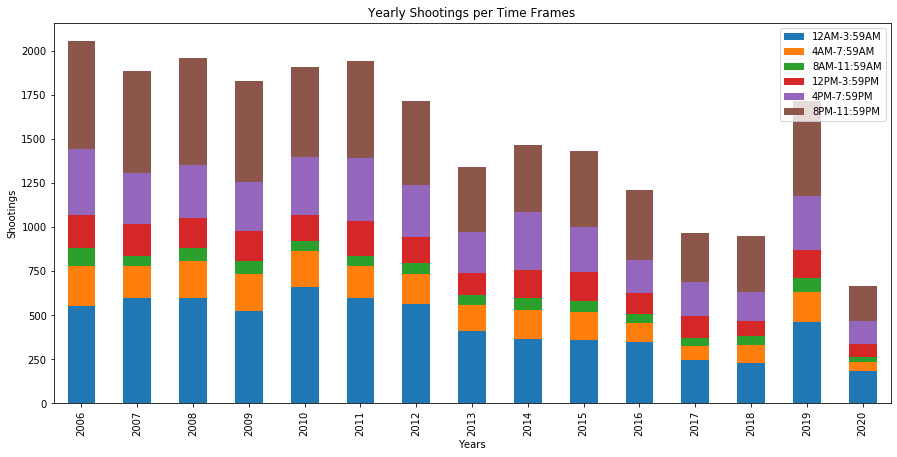

In [12]:
shooting_time_counts = shooting_df.groupby(["Year","Time Buckets"])["Year"].count().unstack("Time Buckets")

shooting_time_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")

plt.title("Yearly Shootings per Time Frames")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

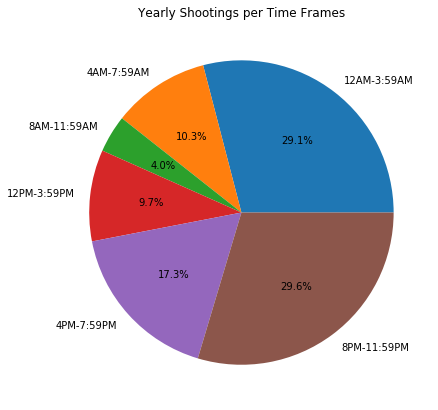

In [13]:
shooting_time_counts = shooting_df.groupby(["Time Buckets"]).count()

pie = shooting_time_counts["INCIDENT_KEY"]

pie.plot(kind="pie",autopct='%1.1f%%',figsize=(7,7))

plt.title("Yearly Shootings per Time Frames")
plt.ylabel("")
plt.show()

In [14]:
murders_df = shooting_df.loc[shooting_df["STATISTICAL_MURDER_FLAG"] == True, :]
murders_df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,...,Y_COORD_CD,Latitude,Longitude,Lon_Lat,Year,ShootingMonth,TIME_HOUR,TIME_MIN,TIME_SEC,Time Buckets
6,73325412,06/22/2010,0:39:00,BROOKLYN,75,0.0,NaN,True,NaN,NaN,...,182675,40.668031,-73.888186,POINT (-73.88818647399995 40.66803128600003),2010,6,0,39,00,12AM-3:59AM
11,78452336,04/27/2011,21:19:00,BRONX,52,0.0,NaN,True,NaN,NaN,...,255094,40.866815,-73.901638,POINT (-73.90163815599993 40.866815014000046),2011,4,21,19,00,8PM-11:59PM
17,52078122,10/09/2008,12:45:00,BROOKLYN,81,0.0,NaN,True,NaN,NaN,...,187539,40.681413,-73.927258,POINT (-73.92725792699997 40.681413218000046),2008,10,12,45,00,12PM-3:59PM
23,163842829,04/16/2017,21:45:00,BRONX,44,0.0,NaN,True,25-44,M,...,246288,40.842654,-73.912990,POINT (-73.91298990299998 40.84265427100007),2017,4,21,45,00,8PM-11:59PM
24,81182107,10/13/2011,15:36:00,BROOKLYN,75,0.0,GAS STATION,True,NaN,NaN,...,185359,40.675396,-73.885510,POINT (-73.88550993999998 40.67539564000003),2011,10,15,36,00,12PM-3:59PM


C:\Users\melodie.staton\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


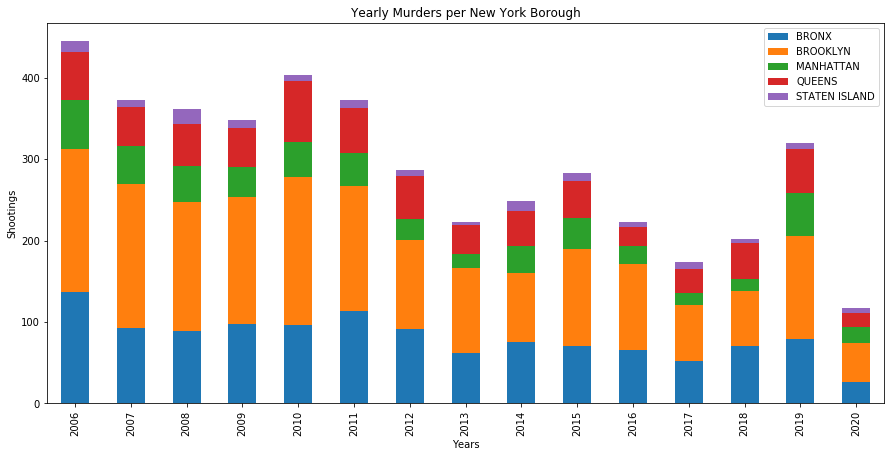

In [15]:
murders_df["Year"] = pd.DatetimeIndex(murders_df['OCCUR_DATE']).year

murder_counts = murders_df.groupby(["Year","BORO"])["Year"].count().unstack("BORO")

murder_counts.plot(kind="bar",stacked=True,figsize=(15,7))
plt.legend(loc="best")
plt.title("Yearly Murders per New York Borough")
plt.xlabel("Years")
plt.ylabel("Shootings")
plt.show()

The mean shootings is 1535.9333333333334
The median shootings is 1716.0
The mode shootings is ModeResult(mode=array([664], dtype=int64), count=array([1]))
The population variance using the NumPy module is 173962.32888888888
The population standard deviation using the NumPy module is 417.0879150597496
Roughly 68% of the data is between 1118.845 and 1953.021
Roughly 95% of the data is between 701.758 and 2370.109
Roughly 99.7% of the data is between 284.67 and 2787.197
The lower quartile of temperatures is: 1273.5
The upper quartile of temperatures is: 1898.5
The interquartile range of temperatures is: 625.0
The the median of temperatures is: 1716.0
Values below 336.0 could be outliers.
Values above 2836.0 could be outliers.


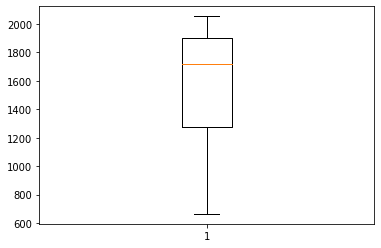

In [16]:
# All Years
shooting_year_groupby = shooting_df.groupby(["Year"])

shooting_year_counts = shooting_year_groupby["INCIDENT_KEY"].count()

mean_shootings = np.mean(shooting_year_counts)
median_shootings = np.median(shooting_year_counts)
mode_shootings = sts.mode(shooting_year_counts)
var_shootings = np.var(shooting_year_counts,ddof = 0)
sd_shootings = np.std(shooting_year_counts,ddof = 0)

quartiles_year = shooting_year_counts.quantile([.25,.5,.75])
lowerq_year = quartiles_year[0.25]
upperq_year = quartiles_year[0.75]
iqr_year = upperq_year-lowerq_year

lower_bound_year = lowerq_year - (1.5*iqr_year)
upper_bound_year = upperq_year + (1.5*iqr_year)

print(f"The mean shootings is {mean_shootings}")
print(f"The median shootings is {median_shootings}")
print(f"The mode shootings is {mode_shootings}")
print(f"The population variance using the NumPy module is {var_shootings}")
print(f"The population standard deviation using the NumPy module is {sd_shootings}")
print(f"Roughly 68% of the data is between {round(mean_shootings-sd_shootings,3)} and {round(mean_shootings+sd_shootings,3)}")
print(f"Roughly 95% of the data is between {round(mean_shootings-2*sd_shootings,3)} and {round(mean_shootings+2*sd_shootings,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_shootings-3*sd_shootings,3)} and {round(mean_shootings+3*sd_shootings,3)}")
print(f"The lower quartile of temperatures is: {lowerq_year}")
print(f"The upper quartile of temperatures is: {upperq_year}")
print(f"The interquartile range of temperatures is: {iqr_year}")
print(f"The the median of temperatures is: {quartiles_year[0.5]}")
print(f"Values below {lower_bound_year} could be outliers.")
print(f"Values above {upper_bound_year} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.boxplot(shooting_year_counts)
plt.show()

The mean shootings is 1927.6
The median shootings is 1910.0
The mode shootings is ModeResult(mode=array([1828], dtype=int64), count=array([1]))
The population variance using the NumPy module is 5806.640000000001
The population standard deviation using the NumPy module is 76.20131232465751
Roughly 68% of the data is between 1851.399 and 2003.801
Roughly 95% of the data is between 1775.197 and 2080.003
Roughly 99.7% of the data is between 1698.996 and 2156.204
The lower quartile of temperatures is: 1780.5
The upper quartile of temperatures is: 1993.5
The interquartile range of temperatures is: 71.0
The the median of temperatures is: 1910.0
Values below 1780.5 could be outliers.
Values above 1993.5 could be outliers.


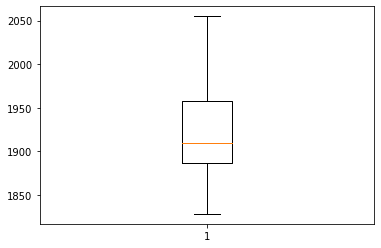

In [17]:
shootings_2006_2010_df = shooting_df.loc[(shooting_df["Year"] >= 2006) &
                                        (shooting_df["Year"] < 2011)]

shooting_2006_2010_groupby = shootings_2006_2010_df.groupby(["Year"])

shooting_2006_2010_counts = shooting_2006_2010_groupby["INCIDENT_KEY"].count()

mean_shootings_2006_2010 = np.mean(shooting_2006_2010_counts)
median_shootings_2006_2010 = np.median(shooting_2006_2010_counts)
mode_shootings_2006_2010 = sts.mode(shooting_2006_2010_counts)
var_shootings_2006_2010 = np.var(shooting_2006_2010_counts,ddof = 0)
sd_shootings_2006_2010 = np.std(shooting_2006_2010_counts,ddof = 0)

quartiles_2006_2010 = shooting_2006_2010_counts.quantile([.25,.5,.75])
lowerq_2006_2010 = quartiles_2006_2010[0.25]
upperq_2006_2010 = quartiles_2006_2010[0.75]
iqr_2006_2010 = upperq_2006_2010-lowerq_2006_2010

lower_bound_2006_2010 = lowerq_2006_2010 - (1.5*iqr_2006_2010)
upper_bound_2006_2010 = lowerq_2006_2010 + (1.5*iqr_2006_2010)

print(f"The mean shootings is {mean_shootings_2006_2010}")
print(f"The median shootings is {median_shootings_2006_2010}")
print(f"The mode shootings is {mode_shootings_2006_2010}")
print(f"The population variance using the NumPy module is {var_shootings_2006_2010}")
print(f"The population standard deviation using the NumPy module is {sd_shootings_2006_2010}")
print(f"Roughly 68% of the data is between {round(mean_shootings_2006_2010-sd_shootings_2006_2010,3)} and {round(mean_shootings_2006_2010+sd_shootings_2006_2010,3)}")
print(f"Roughly 95% of the data is between {round(mean_shootings_2006_2010-2*sd_shootings_2006_2010,3)} and {round(mean_shootings_2006_2010+2*sd_shootings_2006_2010,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_shootings_2006_2010-3*sd_shootings_2006_2010,3)} and {round(mean_shootings_2006_2010+3*sd_shootings_2006_2010,3)}")
print(f"The lower quartile of temperatures is: {lower_bound_2006_2010}")
print(f"The upper quartile of temperatures is: {upper_bound_2006_2010}")
print(f"The interquartile range of temperatures is: {iqr_2006_2010}")
print(f"The the median of temperatures is: {quartiles_2006_2010[0.5]}")
print(f"Values below {lower_bound_2006_2010} could be outliers.")
print(f"Values above {upper_bound_2006_2010} could be outliers.")

fig20062014, ax20062014 = plt.subplots()
ax20062014.boxplot(shooting_2006_2010_counts)
plt.show()

The mean shootings is 1927.6
The median shootings is 1910.0
The mode shootings is ModeResult(mode=array([1828], dtype=int64), count=array([1]))
The population variance using the NumPy module is 5806.640000000001
The population standard deviation using the NumPy module is 76.20131232465751
Roughly 68% of the data is between 1851.399 and 2003.801
Roughly 95% of the data is between 1775.197 and 2080.003
Roughly 99.7% of the data is between 1698.996 and 2156.204
The lower quartile of temperatures is: 1780.5
The upper quartile of temperatures is: 1993.5
The interquartile range of temperatures is: 71.0
The the median of temperatures is: 1910.0
Values below 1780.5 could be outliers.
Values above 1993.5 could be outliers.


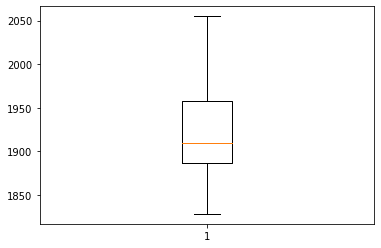

In [18]:
shootings_2006_2010_df = shooting_df.loc[(shooting_df["Year"] >= 2006) &
                                        (shooting_df["Year"] < 2011)]

shooting_2006_2010_groupby = shootings_2006_2010_df.groupby(["Year"])

shooting_2006_2010_counts = shooting_2006_2010_groupby["INCIDENT_KEY"].count()

mean_shootings_2006_2010 = np.mean(shooting_2006_2010_counts)
median_shootings_2006_2010 = np.median(shooting_2006_2010_counts)
mode_shootings_2006_2010 = sts.mode(shooting_2006_2010_counts)
var_shootings_2006_2010 = np.var(shooting_2006_2010_counts,ddof = 0)
sd_shootings_2006_2010 = np.std(shooting_2006_2010_counts,ddof = 0)

quartiles_2006_2010 = shooting_2006_2010_counts.quantile([.25,.5,.75])
lowerq_2006_2010 = quartiles_2006_2010[0.25]
upperq_2006_2010 = quartiles_2006_2010[0.75]
iqr_2006_2010 = upperq_2006_2010-lowerq_2006_2010

lower_bound_2006_2010 = lowerq_2006_2010 - (1.5*iqr_2006_2010)
upper_bound_2006_2010 = lowerq_2006_2010 + (1.5*iqr_2006_2010)

print(f"The mean shootings is {mean_shootings_2006_2010}")
print(f"The median shootings is {median_shootings_2006_2010}")
print(f"The mode shootings is {mode_shootings_2006_2010}")
print(f"The population variance using the NumPy module is {var_shootings_2006_2010}")
print(f"The population standard deviation using the NumPy module is {sd_shootings_2006_2010}")
print(f"Roughly 68% of the data is between {round(mean_shootings_2006_2010-sd_shootings_2006_2010,3)} and {round(mean_shootings_2006_2010+sd_shootings_2006_2010,3)}")
print(f"Roughly 95% of the data is between {round(mean_shootings_2006_2010-2*sd_shootings_2006_2010,3)} and {round(mean_shootings_2006_2010+2*sd_shootings_2006_2010,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_shootings_2006_2010-3*sd_shootings_2006_2010,3)} and {round(mean_shootings_2006_2010+3*sd_shootings_2006_2010,3)}")
print(f"The lower quartile of temperatures is: {lower_bound_2006_2010}")
print(f"The upper quartile of temperatures is: {upper_bound_2006_2010}")
print(f"The interquartile range of temperatures is: {iqr_2006_2010}")
print(f"The the median of temperatures is: {quartiles_2006_2010[0.5]}")
print(f"Values below {lower_bound_2006_2010} could be outliers.")
print(f"Values above {upper_bound_2006_2010} could be outliers.")

fig20062014, ax20062014 = plt.subplots()
ax20062014.boxplot(shooting_2006_2010_counts)
plt.show()

The mean shootings is 1665.0
The median shootings is 1717.0
The mode shootings is ModeResult(mode=array([1339], dtype=int64), count=array([1]))
The population variance using the NumPy module is 61352.0
The population standard deviation using the NumPy module is 247.69335881286764
Roughly 68% of the data is between 1417.307 and 1912.693
Roughly 95% of the data is between 1169.613 and 2160.387
Roughly 99.7% of the data is between 921.92 and 2408.08
The lower quartile of temperatures is: 1078.0
The upper quartile of temperatures is: 1978.0
The interquartile range of temperatures is: 300.0
The the median of temperatures is: 1717.0
Values below 1078.0 could be outliers.
Values above 1978.0 could be outliers.


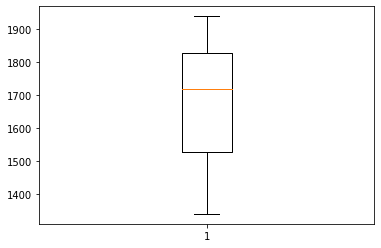

In [19]:
shootings_2011_2014_df = shooting_df.loc[(shooting_df["Year"] >= 2011) &
                                        (shooting_df["Year"] < 2014)]

shooting_2011_2014_groupby = shootings_2011_2014_df.groupby(["Year"])

shooting_2011_2014_counts = shooting_2011_2014_groupby["INCIDENT_KEY"].count()

mean_shootings_2011_2014 = np.mean(shooting_2011_2014_counts)
median_shootings_2011_2014 = np.median(shooting_2011_2014_counts)
mode_shootings_2011_2014 = sts.mode(shooting_2011_2014_counts)
var_shootings_2011_2014 = np.var(shooting_2011_2014_counts,ddof = 0)
sd_shootings_2011_2014 = np.std(shooting_2011_2014_counts,ddof = 0)

quartiles_2011_2014 = shooting_2011_2014_counts.quantile([.25,.5,.75])
lowerq_2011_2014 = quartiles_2011_2014[0.25]
upperq_2011_2014 = quartiles_2011_2014[0.75]
iqr_2011_2014 = upperq_2011_2014-lowerq_2011_2014

lower_bound_2011_2014 = lowerq_2011_2014 - (1.5*iqr_2011_2014)
upper_bound_2011_2014 = lowerq_2011_2014 + (1.5*iqr_2011_2014)

print(f"The mean shootings is {mean_shootings_2011_2014}")
print(f"The median shootings is {median_shootings_2011_2014}")
print(f"The mode shootings is {mode_shootings_2011_2014}")
print(f"The population variance using the NumPy module is {var_shootings_2011_2014}")
print(f"The population standard deviation using the NumPy module is {sd_shootings_2011_2014}")
print(f"Roughly 68% of the data is between {round(mean_shootings_2011_2014-sd_shootings_2011_2014,3)} and {round(mean_shootings_2011_2014+sd_shootings_2011_2014,3)}")
print(f"Roughly 95% of the data is between {round(mean_shootings_2011_2014-2*sd_shootings_2011_2014,3)} and {round(mean_shootings_2011_2014+2*sd_shootings_2011_2014,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_shootings_2011_2014-3*sd_shootings_2011_2014,3)} and {round(mean_shootings_2011_2014+3*sd_shootings_2011_2014,3)}")
print(f"The lower quartile of temperatures is: {lower_bound_2011_2014}")
print(f"The upper quartile of temperatures is: {upper_bound_2011_2014}")
print(f"The interquartile range of temperatures is: {iqr_2011_2014}")
print(f"The the median of temperatures is: {quartiles_2011_2014[0.5]}")
print(f"Values below {lower_bound_2011_2014} could be outliers.")
print(f"Values above {upper_bound_2011_2014} could be outliers.")

fig20062014, ax20062014 = plt.subplots()
ax20062014.boxplot(shooting_2011_2014_counts)
plt.show()

The mean shootings is 1255.6
The median shootings is 1208.0
The mode shootings is ModeResult(mode=array([951], dtype=int64), count=array([1]))
The population variance using the NumPy module is 84196.24
The population standard deviation using the NumPy module is 290.1658835907488
Roughly 68% of the data is between 965.434 and 1545.766
Roughly 95% of the data is between 675.268 and 1835.932
Roughly 99.7% of the data is between 385.102 and 2126.098
The lower quartile of temperatures is: 969.0
The upper quartile of temperatures is: 1434.0
The interquartile range of temperatures is: 465.0
The the median of temperatures is: 1208.0
Values below 271.5 could be outliers.
Values above 1666.5 could be outliers.


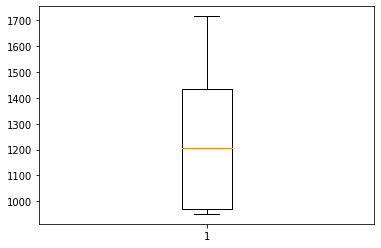

In [20]:
shootings_2015_df = shooting_df.loc[(shooting_df["Year"] >= 2015) &
                                        (shooting_df["Year"] < 2020)]

shooting_2015_groupby = shootings_2015_df.groupby(["Year"])

shooting_2015_counts = shooting_2015_groupby["INCIDENT_KEY"].count()

mean_shootings_2015 = np.mean(shooting_2015_counts)
median_shootings_2015 = np.median(shooting_2015_counts)
mode_shootings_2015 = sts.mode(shooting_2015_counts)
var_shootings_2015 = np.var(shooting_2015_counts,ddof = 0)
sd_shootings_2015 = np.std(shooting_2015_counts,ddof = 0)

quartiles_2015 = shooting_2015_counts.quantile([.25,.5,.75])
lowerq_2015 = quartiles_2015[0.25]
upperq_2015 = quartiles_2015[0.75]
iqr_2015 = upperq_2015-lowerq_2015

lower_bound_2015 = lowerq_2015 - (1.5*iqr_2015)
upper_bound_2015 = lowerq_2015 + (1.5*iqr_2015)

print(f"The mean shootings is {mean_shootings_2015}")
print(f"The median shootings is {median_shootings_2015}")
print(f"The mode shootings is {mode_shootings_2015}")
print(f"The population variance using the NumPy module is {var_shootings_2015}")
print(f"The population standard deviation using the NumPy module is {sd_shootings_2015}")
print(f"Roughly 68% of the data is between {round(mean_shootings_2015-sd_shootings_2015,3)} and {round(mean_shootings_2015+sd_shootings_2015,3)}")
print(f"Roughly 95% of the data is between {round(mean_shootings_2015-2*sd_shootings_2015,3)} and {round(mean_shootings_2015+2*sd_shootings_2015,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_shootings_2015-3*sd_shootings_2015,3)} and {round(mean_shootings_2015+3*sd_shootings_2015,3)}")
print(f"The lower quartile of temperatures is: {lowerq_2015}")
print(f"The upper quartile of temperatures is: {upperq_2015}")
print(f"The interquartile range of temperatures is: {iqr_2015}")
print(f"The the median of temperatures is: {quartiles_2015[0.5]}")
print(f"Values below {lower_bound_2015} could be outliers.")
print(f"Values above {upper_bound_2015} could be outliers.")

fig2015, ax2015 = plt.subplots()
ax2015.boxplot(shooting_2015_counts)
plt.show()

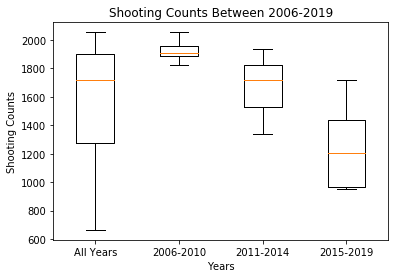

In [21]:
shooting_year_counts_df = pd.DataFrame(shooting_year_counts)
shooting_2006_2010_counts_df = pd.DataFrame(shooting_2006_2010_counts)
shooting_2011_2014_counts_df = pd.DataFrame(shooting_2011_2014_counts)
shooting_2015_counts_df = pd.DataFrame(shooting_2015_counts)

combine = [shooting_year_counts_df["INCIDENT_KEY"],
           shooting_2006_2010_counts_df["INCIDENT_KEY"],
           shooting_2011_2014_counts_df["INCIDENT_KEY"],
           shooting_2015_counts_df["INCIDENT_KEY"]]

year_groupings = ["All Years", "2006-2010", "2011-2014", "2015-2019"]
tick_locations = [1,2,3,4]

fig5,ax5 = plt.subplots()
ax5.set_ylabel("Shooting Counts")
ax5.set_xlabel("Years")
ax5.set_title("Shooting Counts Between 2006-2019")
outlier = dict(marker="o", markerfacecolor="red", markersize=10)
ax5.boxplot(combine,flierprops=outlier)
plt.xticks(tick_locations,year_groupings)

plt.show()

In [22]:
shooting_year_counts_df = shooting_year_counts_df.reset_index(drop=False)

The r-squared is: 0.6992422580428906


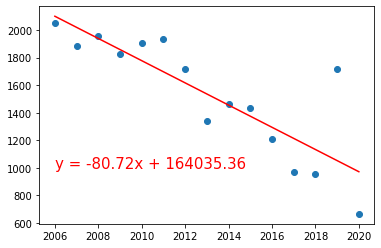

In [23]:
x_values = shooting_year_counts_df["Year"]
y_values = shooting_year_counts_df["INCIDENT_KEY"]
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2006,1000),fontsize=15,color="red")
#plt.xlabel('Rooms in House')
#plt.ylabel('Median House Prices ($1000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [24]:
shooting_month_year_counts = shooting_month_counts.reset_index(drop=False)
shooting_month_year_counts

ShootingMonth,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,2006,129.0,97.0,102.0,156.0,173.0,180.0,233.0,245.0,196.0,199.0,167.0,178.0
1,2007,109.0,78.0,103.0,117.0,199.0,201.0,239.0,212.0,173.0,197.0,135.0,124.0
2,2008,114.0,80.0,128.0,153.0,194.0,197.0,233.0,215.0,197.0,153.0,130.0,164.0
3,2009,105.0,113.0,104.0,136.0,172.0,182.0,211.0,210.0,167.0,143.0,161.0,124.0
4,2010,97.0,123.0,132.0,167.0,166.0,218.0,211.0,203.0,181.0,144.0,140.0,128.0
5,2011,102.0,98.0,89.0,136.0,176.0,178.0,221.0,217.0,250.0,188.0,133.0,151.0
6,2012,114.0,101.0,130.0,127.0,173.0,183.0,247.0,191.0,140.0,113.0,98.0,100.0
7,2013,119.0,66.0,85.0,94.0,99.0,139.0,141.0,162.0,120.0,125.0,98.0,91.0
8,2014,107.0,52.0,109.0,98.0,129.0,153.0,161.0,169.0,109.0,130.0,107.0,140.0
9,2015,117.0,68.0,93.0,106.0,181.0,135.0,132.0,162.0,115.0,103.0,104.0,118.0


In [25]:
#shootings_summer_df = shooting_month_year_counts[["Year",shooting_month_year_counts["ShootingMonth"][5]]
columns = ['Year', 5, 6, 7]
shootings_summer_df = pd.DataFrame(shooting_month_year_counts, columns=columns)
shootings_summer_df = shootings_summer_df.rename(columns={5:"May",6:"June",7:"July"})
shootings_summer_df

,Year,May,June,July
0,2006,173.0,180.0,233.0
1,2007,199.0,201.0,239.0
2,2008,194.0,197.0,233.0
3,2009,172.0,182.0,211.0
4,2010,166.0,218.0,211.0
5,2011,176.0,178.0,221.0
6,2012,173.0,183.0,247.0
7,2013,99.0,139.0,141.0
8,2014,129.0,153.0,161.0
9,2015,181.0,135.0,132.0


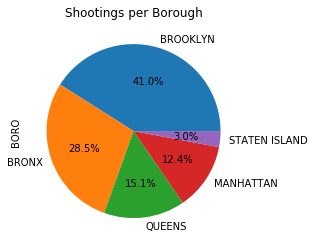

In [26]:
#Shootings per borough
borough_shooting_pie = shooting_df.BORO.value_counts().plot(kind="pie",autopct='%1.1f%%', title = "Shootings per Borough" )

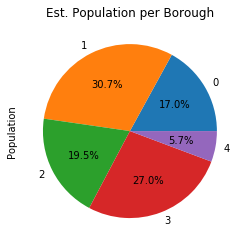

In [27]:
#Population of Boroughs
borough_population_pie = nyc_five_boroughs_df.Population.plot(kind="pie",
                                                              autopct='%1.1f%%', 
                                                              title = "Est. Population per Borough" )

In [28]:
shooting_month_year_groupby = shooting_df.groupby(["Year","ShootingMonth"])
counts_year_month = shooting_month_year_groupby["INCIDENT_KEY"].count()
counts_year_month_df = pd.DataFrame(counts_year_month)
counts_year_month_df.reset_index(inplace=True)

In [29]:
counts_year_month_df["ShootingMonth"] = counts_year_month_df["ShootingMonth"].replace({
    1:"January",
    2:"February",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9:"September",
    10:"October",
    11:"November",
    12:"December"
})

rest_of_year_2020 = [ 
    (2020,'July',0),
    (2020,'August',0),
    (2020,'September',0),
    (2020,'October',0),
    (2020,'November',0),
    (2020,'December',0)
]

rest_of_year_2020_df = pd.DataFrame(rest_of_year_2020)
rest_of_year_2020_df = rest_of_year_2020_df.rename(columns={0:"Year",1:"ShootingMonth",2:"INCIDENT_KEY"})

In [30]:
all_months_years_df = counts_year_month_df.append(rest_of_year_2020_df, ignore_index=True)

In [31]:
all_months_years_df

,Year,ShootingMonth,INCIDENT_KEY
0,2006,January,129
1,2006,February,97
2,2006,March,102
3,2006,April,156
4,2006,May,173
...,...,...,...
175,2020,August,0
176,2020,September,0
177,2020,October,0
178,2020,November,0


In [32]:
counts_year_month_2018_df = all_months_years_df.loc[all_months_years_df["Year"] == 2018]
counts_year_month_2019_df = all_months_years_df.loc[all_months_years_df["Year"] == 2019]
counts_year_month_2020_df = all_months_years_df.loc[all_months_years_df["Year"] == 2020]

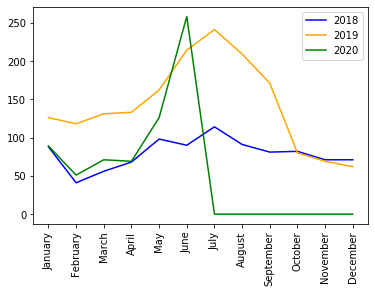

In [33]:
x_axis = all_months_years_df["ShootingMonth"].unique()

y_axis_2018 = counts_year_month_2018_df["INCIDENT_KEY"]
y_axis_2019 = counts_year_month_2019_df["INCIDENT_KEY"]
y_axis_2020 = counts_year_month_2020_df["INCIDENT_KEY"]

year_2018, = plt.plot(x_axis, y_axis_2018, color="blue", label="2018" )

years_2018_2019, = plt.plot(x_axis,y_axis_2019,label="2019",color="orange")

years_2018_2019_2020, = plt.plot(x_axis,y_axis_2020,label="2020",color="green")

# Create a legend for our chart
plt.legend(handles=[year_2018,years_2018_2019, years_2018_2019_2020], loc="best")
plt.xticks(rotation=90)
# Show the chart
plt.show()

The r-squared is: 0.06963514584359559


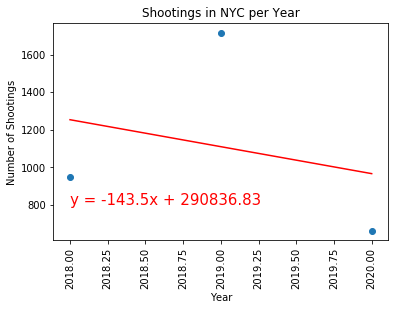

In [34]:
# Plotting the shooting counts per year and doing a linear regression
shootings_2018_2019_2020_df = shooting_df.loc[(shooting_df["Year"] == 2018) |
                                              (shooting_df["Year"] == 2019) |
                                              (shooting_df["Year"] == 2020) ]

shootings_2018_2019_2020_counts = shootings_2018_2019_2020_df.groupby(["Year"]).count()

shootings_2018_2019_2020_counts.reset_index(inplace=True)

x_values = shootings_2018_2019_2020_counts["Year"]
y_values = shootings_2018_2019_2020_counts["INCIDENT_KEY"]


(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2018,800),fontsize=15,color="red")
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.title("Shootings in NYC per Year")
print(f"The r-squared is: {rvalue**2}")

plt.xticks(rotation=90)

# Save statistical analysis box plot
#plt.savefig("Images/NYC_Shootings_RegressionAnalysis.png")

plt.show()